**The Problem Statement**

The goal of this project is to predict whether a customer will churn (i.e., stop using the service) based on their historical data. The dataset provided includes customer demographic details, account information, and service usage patterns. By building a predictive model, the aim is to identify customers who are likely to churn, allowing the company to take proactive steps to retain them.

**Data Loading and Initial Exploration**

*Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*Importing the Dataset*

In [2]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

*Exploring the Dataset*

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values in our dataset. Hence, we do not need any Data Cleaning

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


*Converting Categorical Values*

In [7]:
df['Churn'] = df['Churn'].apply(lambda x:1 if x=='Yes' else 0)

In [8]:
df['gender'] = df['gender'].apply(lambda x:1 if x=='Male' else 0)

*Encoding Categorical Values*

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df = pd.get_dummies(df, columns = ['Contract', 'PaymentMethod', 'InternetService'], drop_first = True)

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

Here we used One-Hot Encoding or label encoding for categorical features that have more than two categories.

*Handling Zero and Inconsistent Values*

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

Checking for Missing Values in the 'TotalCharges Column'

In [16]:
df['TotalCharges'].isnull().sum()

11

Replacing the Missing Values with the Median of the column

In [17]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

*Dropping Unnecessary Columns*

In [18]:
df.drop(['customerID'], axis = 1, inplace = True)

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

**Exploratory Data Analysis**

*Visualize Data Distributions*

Here we will plot histograms to understand the distribution of numerical features in the dataset.

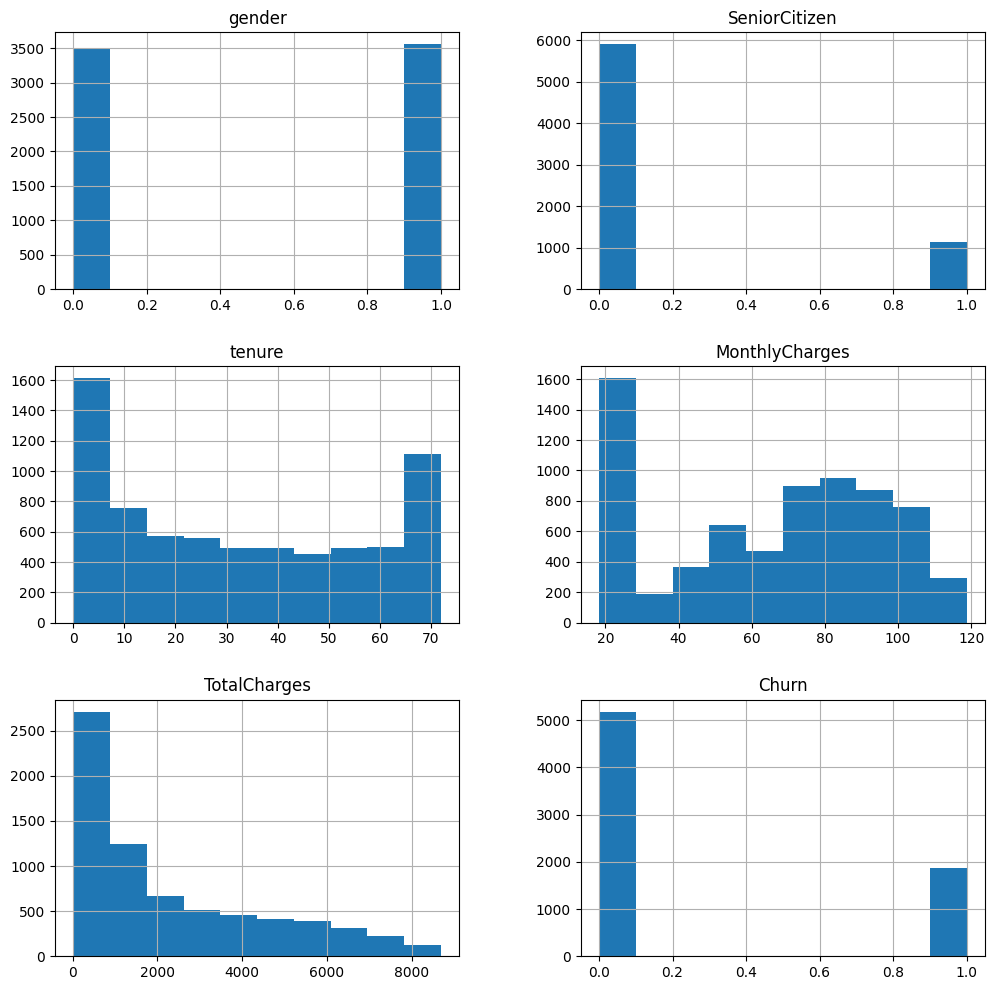

In [20]:
df.hist(figsize=(12,12))
plt.show()

*Analyzing Relationships*

Here we use Correlation matrix and HeatMap to identify relationships between features.

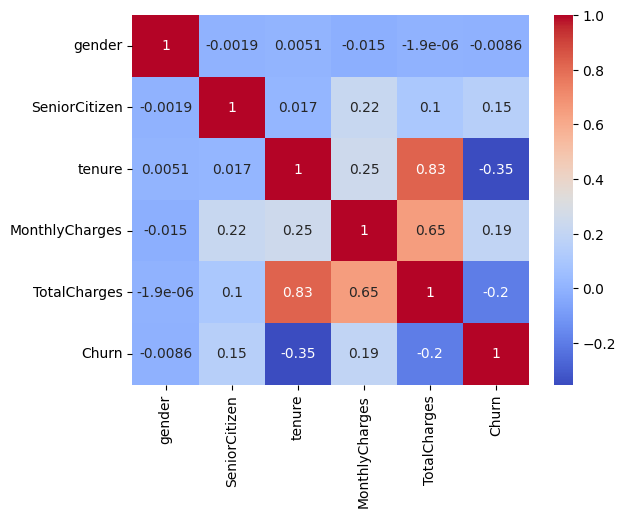

In [22]:
#Select only numeric columns
numerical_df = df.select_dtypes(include=['number'])

#Calculate correlation and plot
sns.heatmap(numerical_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

*Churn Analysis*

Here we will analyze which features have the most significant impact on churn, such as 'Contract', 'MonthlyCharges' and 'tenure'.

In [24]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

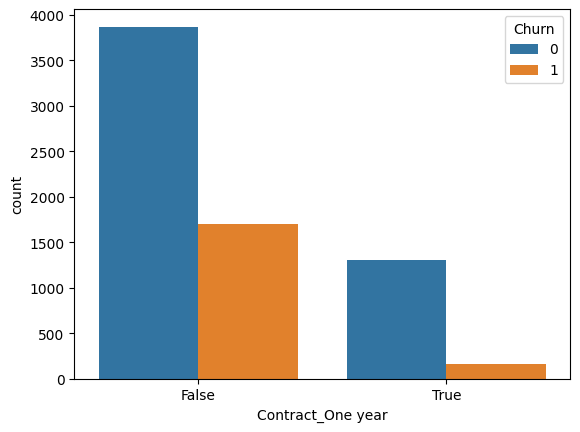

In [25]:
sns.countplot(x = 'Contract_One year', hue = 'Churn', data = df)
plt.show()

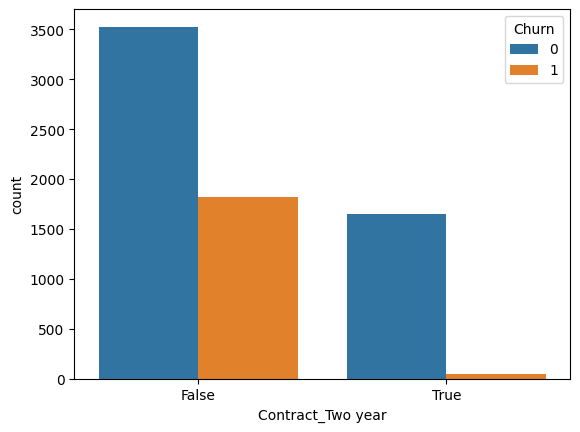

In [26]:
sns.countplot(x = 'Contract_Two year', hue = 'Churn', data = df)
plt.show()

**Data Preprocessing for Modelling**

*Feature Selection*

Here we identify and select the most important features for the model

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

X = df.drop('Churn',axis=1)
y = df['Churn']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in X
for col in X.columns:
    # Check if the column contains object (string) values
    if X[col].dtype == 'object':
        # Use LabelEncoder to convert string values to numerical values
        X[col] = label_encoder.fit_transform(X[col])

# Apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two DataFrames for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

                             Specs          Score
15                    TotalCharges  627340.305176
4                           tenure   16278.923685
14                  MonthlyCharges    3680.787699
7                   OnlineSecurity     551.611529
10                     TechSupport     523.303866
17               Contract_Two year     488.578090
19  PaymentMethod_Electronic check     426.422767
21     InternetService_Fiber optic     374.476216
22              InternetService_No     286.520193
8                     OnlineBackup     230.086520


*Train-test Split*

Split the data into training and testing sets.

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.head()
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
185,0,0,Yes,No,1,No,No phone service,No,No,No,...,Yes,24.80,24.80,False,False,False,True,False,False,False
2715,1,0,No,No,41,Yes,Yes,No internet service,No internet service,No internet service,...,Yes,25.25,996.45,False,False,False,False,False,False,True
3825,0,0,Yes,Yes,52,Yes,No,No internet service,No internet service,No internet service,...,No,19.35,1031.70,False,True,False,False,True,False,True
1807,0,0,No,No,1,Yes,No,No,No,Yes,...,No,76.35,76.35,False,False,False,True,False,True,False
132,1,0,No,No,67,Yes,No,No,No,No,...,No,50.55,3260.10,False,True,False,False,False,False,False


*Data Scaling*

Here we scale numerical features to standardize the input.

In [37]:
# Convert column names to strings to avoid TypeError
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled

array([[-1.02516569, -0.4377492 , -0.46568336, ..., -0.88705673,
         0.52408075, -0.52408075],
       [-1.02516569, -0.4377492 ,  0.88553679, ...,  1.12732361,
         0.52408075, -0.52408075],
       [ 0.97545208, -0.4377492 , -1.28460467, ..., -0.88705673,
         0.52408075, -0.52408075],
       ...,
       [ 0.97545208, -0.4377492 , -0.83419795, ..., -0.88705673,
        -1.9081029 ,  1.9081029 ],
       [ 0.97545208,  2.28441306, -0.83419795, ...,  1.12732361,
         0.52408075, -0.52408075],
       [ 0.97545208, -0.4377492 , -0.26095304, ..., -0.88705673,
        -1.9081029 ,  1.9081029 ]])

In [39]:
X_test_scaled

array([[-1.02516569, -0.4377492 , -1.28460467, ..., -0.88705673,
         0.52408075, -0.52408075],
       [ 0.97545208, -0.4377492 ,  0.35323794, ..., -0.88705673,
        -1.9081029 ,  1.9081029 ],
       [-1.02516569, -0.4377492 ,  0.80364466, ..., -0.88705673,
        -1.9081029 ,  1.9081029 ],
       ...,
       [ 0.97545208, -0.4377492 , -0.62946762, ..., -0.88705673,
        -1.9081029 ,  1.9081029 ],
       [-1.02516569, -0.4377492 ,  1.49972776, ..., -0.88705673,
         0.52408075, -0.52408075],
       [ 0.97545208, -0.4377492 , -1.28460467, ..., -0.88705673,
         0.52408075, -0.52408075]])

**Model Building**

*Select Algorithm*

Here we start with basic models like Logistic Regression, and then explore more complex models like Random Forest, Gradient Boosting, or XGBoost.

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*Model Training*

Here we train the selected models on the training data.

In [47]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*Model Evaluation*

Here we evaluate model performance using metrics like accuracy, precision, recall, F1 score, and ROC-AUC.

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

ROC AUC Score: 0.746428830208991


*Hyperparameter Tuning*

Here we optimize model parameters using GridSearchCV or RandomizedSearchCV.

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']})

**Model Deployment**

*Save the Model*

Now we save the trained model using joblib or pickle for future predictions.

In [50]:
import joblib

joblib.dump(model, 'churn_model.pkl')

['churn_model.pkl']

*Create a Prediction Function*

We write a function that loads the model and makes predictions on new customer data.

In [51]:
def predict_churn(new_data):
    model = joblib.load('churn_model.pkl')
    prediction = model.predict(new_data)
    return prediction

*Deploy the Model*

In [52]:
# Save the model to a file
joblib.dump(model, 'churn_model.pkl')

# Expose the model as an API endpoint using a framework like Flask or Django
# This allows other applications to access and use the model for predictions


['churn_model.pkl']